In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [29]:
mnist_test = dset.MNIST("",train=False, transform=transforms.ToTensor(),target_transform=None, download=True)

Using downloaded and verified file: MNIST/raw/train-images-idx3-ubyte.gz
Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw
Using downloaded and verified file: MNIST/raw/train-labels-idx1-ubyte.gz
Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw
Using downloaded and verified file: MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:479: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


mnist_test 길이 10000
image data 형태 torch.Size([1, 28, 28])
label:  7


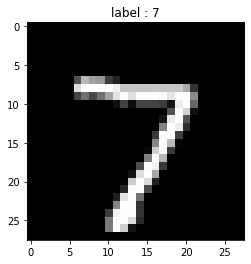

In [31]:
print("mnist_test 길이",len(mnist_test))

image, label = mnist_test.__getitem__(0)
print("image data 형태",image.size())
print("label: ",label)

img = image.numpy()
plt.title("label : %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [32]:
def sigmoid(x):
  return 1 / (1+np.exp(-x))

def softmax(x):
  return np.exp(x)/np.sum(np.exp(x))

In [45]:
class MyMLP:
  def __init__(self, n_input, n_hidden1, n_hidden2, n_output):
    self.W1 = np.zeros((n_hidden1, n_input), dtype=np.float32)
    self.b1 = np.zeros((n_hidden1,),dtype=np.float32)

    self.W2 = np.zeros((n_hidden2, n_hidden1), dtype=np.float32)
    self.b2 = np.zeros((n_hidden2,),dtype=np.float32)

    self.W3 = np.zeros((n_output, n_hidden2), dtype=np.float32)
    self.b3 = np.zeros((n_output,),dtype=np.float32)

  def __call__(self,x):
    x=x.reshape(-1)

    h1 = sigmoid(np.dot(self.W1, x)+self.b1)
    h2 = np.dot(self.W2,h1)+self.b2
    out = np.dot(self.W3,h2)+self.b3

    return softmax(out)

In [46]:
model = MyMLP(28*28,256,128,10)

In [40]:
print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


In [48]:
weight = np.load('./nets/mlp_weight.npz')
model.W1 = weight['W1']
model.b1 = weight['b1']
model.W2 = weight['W2']
model.b2 = weight['b2']
model.W3 = weight['W3']
model.b3 = weight['b3']

print(model.W1.shape, model.b1.shape)
print(model.W2.shape, model.b2.shape)
print(model.W3.shape, model.b3.shape)

(256, 784) (256,)
(128, 256) (128,)
(10, 128) (10,)


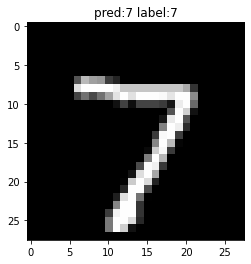

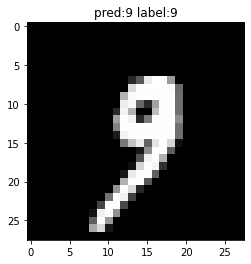

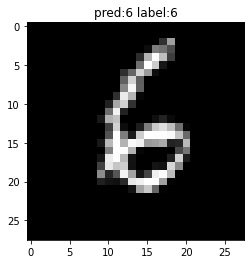

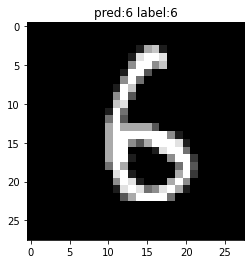

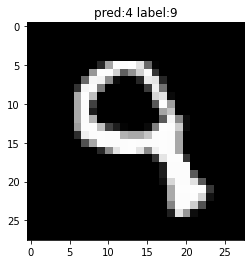

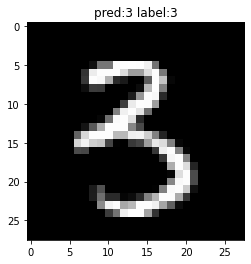

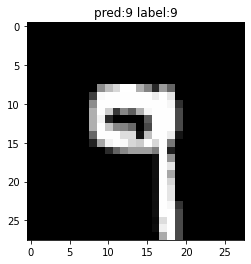

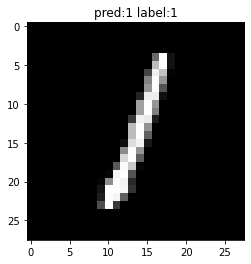

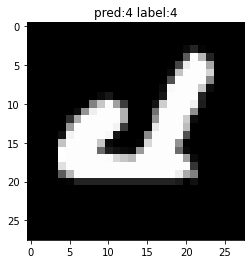

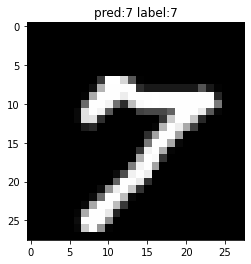

정확도: 91.91


In [51]:
mysum = 0

m = len(mnist_test)
cnt = 0
for i in range(m):
  image,label = mnist_test.__getitem__(i)
  output = model(image)

  if(i%1000==0):
    img = image.numpy()
    pred_label = np.argmax(output)

    plt.title('pred:%d label:%d'%(pred_label,label))
    plt.imshow(img[0],cmap='gray')
    plt.show()

  cnt+=1
  mysum +=(np.argmax(output)==label)

print('정확도: %.2f' %( (float(mysum) / cnt) *100.0))